In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
import numpy as np
import pandas as pd

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/pulsar_stars.csv')
print(df.columns)
print(df.describe())

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')
       Mean_of_the_integrated_profile  \
count                    17898.000000   
mean                       111.079968   
std                         25.652935   
min                          5.812500   
25%                        100.929688   
50%                        115.078125   
75%                        127.085938   
max                        192.617188   

       Standard_deviation_of_the_integrated_profile  \
count                                  17898.000000   
mean                                      46.549532   
std                                        6.843189   
min           

In [ ]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

def scaled_data(original_data):
  # mix-max scale the data between 0 and 1
  scaled_data = minmax_scaling(original_data, columns=[0])

  # plot both together to compare
  fig, ax = plt.subplots(1, 2, figsize=(15, 3))
  sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
  ax[0].set_title("Original Data")
  sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
  ax[1].set_title("Scaled data")
  plt.show()
  return scaled_data

In [ ]:
class LogisticRegression():

  def __init__(self, learning_rate = 0.01, n_iters=10):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.losses = []

  def binary_cross_entropy(self, y_pred, y):
    return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))

  def sigmoid(self, X, weights, bias):
    z = np.dot(X, weights) + bias
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      # print(self.weights)
      A = self.sigmoid(X, self.weights, self.bias)
      self.losses.append(self.binary_cross_entropy(A, y))
      dz = A - y
      dw = np.dot(X.T, dz) / n_samples
      db = np.sum(dz) / n_samples

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X, threhold):
    y_H =  self.sigmoid(X, self.weights, self.bias)
    return np.where(y_H > threhold, 1, 0)


In [ ]:
from sklearn.model_selection import KFold, train_test_split

def train_model(model, X, y, n_splits):
  k_flod = KFold(n_splits=n_splits)
  # print(model)
  for threshold in range(4, 7):
    train_res = []
    test_res = []
    for i, (train_id, test_id) in enumerate(k_flod.split(X)):
      model.fit(X.loc[train_id], y[train_id])
      y_pred = model.predict(X.loc[train_id], threshold/10)
      train_res.append((y[train_id] == y_pred).sum() / len(y_pred))
      y_pred = model.predict(X.loc[test_id], threshold/10)
      test_res.append((y[test_id] == y_pred).sum() / len(y_pred))
    plt.plot([i+1 for i in range(n_splits)], train_res, 'b', label='Train Accuracy')
    plt.plot([i+1 for i in range(n_splits)], test_res, 'r', label='Test Accuracy')

    plt.title('Accuracy Plot')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))


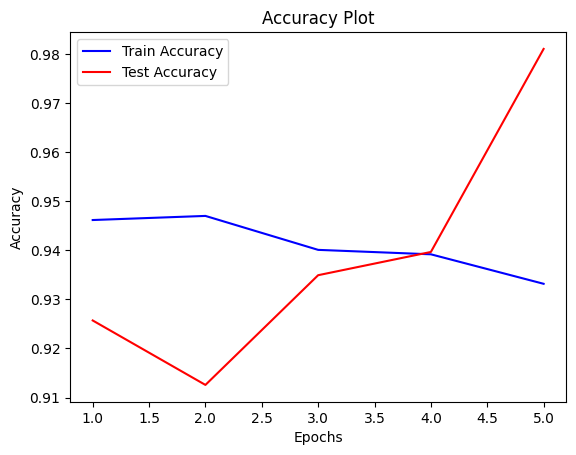

<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))


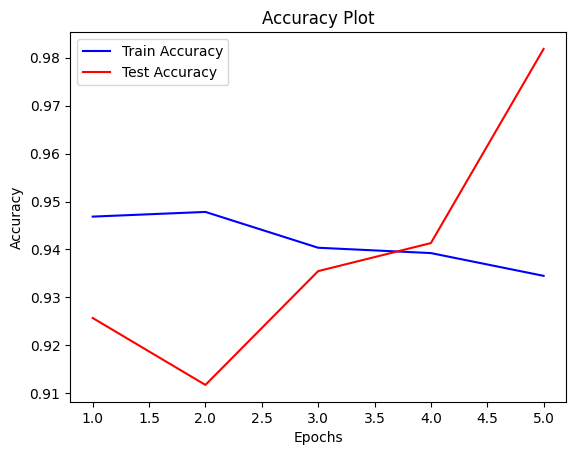

<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-13-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))


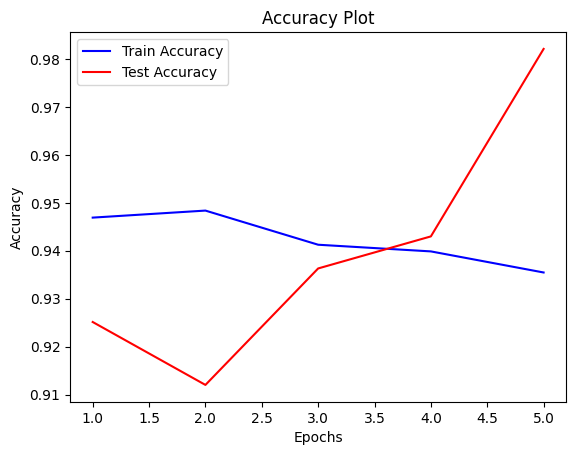

In [ ]:

X = df.drop(['target_class'], axis=1)
y = df['target_class']
train_model(LogisticRegression(), X, y, 5)

<ipython-input-4-d1395d284b55>:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean( y*np.log(y_pred) + (1-y) * np.log(1-y_pred))


F1 score: 0.6438933083762284
Normalized confusion matrix


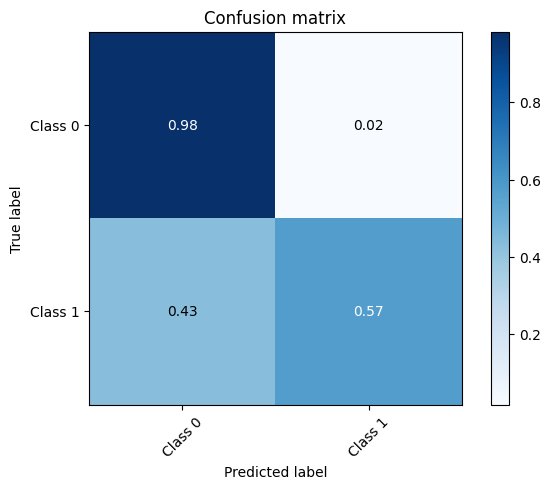

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_model(model, X, y, n_splits):
  k_flod = KFold(n_splits=n_splits)
  # print(model)

  train_res = []
  test_res = []
  for i, (train_id, test_id) in enumerate(k_flod.split(X)):
    model.fit(X.loc[train_id], y[train_id])
    y_pred = model.predict(X.loc[train_id], 0.5)
    classes = ['Class 0', 'Class 1']
    print("F1 score:", f1_score(y[train_id], y_pred))
    plot_confusion_matrix(confusion_matrix(y[train_id], y_pred), normalize=True, classes=classes)
    break
X = df.drop(['target_class'], axis=1)
y = df['target_class']
train_model(LogisticRegression(), X, y, 5)